# Artificial Neural Network

### Import all libraries

In [ ]:
from google.colab import drive
import numpy as np 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import layers
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import pandas as pd

### Printing GPU specs

In [ ]:
!nvidia-smi

Fri Dec 30 15:12:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    51W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Connecting to Google Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


### Loading datasets

In [ ]:
X_train = np.load('/content/drive/MyDrive/ml_dl/immagini-5/training_set/X_train.npy')
y_train = np.load('/content/drive/MyDrive/ml_dl/immagini-5/training_set/y_train.npy')

X_validation = np.load('/content/drive/MyDrive/ml_dl/immagini-5/validation_set/X_val.npy')
y_validation = np.load('/content/drive/MyDrive/ml_dl/immagini-5/validation_set/y_val.npy')

X_test = np.load('/content/drive/MyDrive/ml_dl/immagini-5/test_set/X_test.npy')
y_test = np.load('/content/drive/MyDrive/ml_dl/immagini-5/test_set/y_test.npy')

X = np.load('/content/drive/MyDrive/ml_dl/immagini-5/dataset/X.npy')
y = np.load('/content/drive/MyDrive/ml_dl/immagini-5/dataset/y.npy')

### Reshaping datasets

In [ ]:
X_train.shape

(21175, 19200)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 80, 80, 3)
X_test = X_test.reshape(X_test.shape[0], 80, 80, 3)
X_validation = X_validation.reshape(X_validation.shape[0], 80, 80, 3)

### LeNet

In [ ]:
EPOCHS = 20

In [ ]:
kernel_initializer = keras.initializers.glorot_uniform(seed = np.random.randint(20))

lenet = Sequential()
lenet.add(layers.Conv2D(filters = 32, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (80, 80, 3)))
lenet.add(layers.MaxPool2D(strides = 2))
lenet.add(layers.Conv2D(filters = 48, kernel_size = (5,5), padding = 'valid', activation = 'relu'))
lenet.add(layers.MaxPool2D(strides = 2))
lenet.add(layers.Flatten())
lenet.add(layers.Dense(256, activation = 'relu', kernel_initializer = kernel_initializer))
lenet.add(layers.Dropout(0.5))
lenet.add(layers.Dense(84, activation = 'relu', kernel_initializer = kernel_initializer))
lenet.add(layers.Dropout(0.5))
lenet.add(layers.Dense(7, activation = 'softmax'))

print(lenet.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 80, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 48)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 15552)             0         
                                                                 
 dense (Dense)               (None, 256)               3

Running LeNet

In [ ]:
lenet.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer='adam')
es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'auto', verbose = 1, patience = 3)
history = lenet.fit(X_train, y_train, epochs = EPOCHS, validation_data = (X_validation, y_validation),  batch_size = 256, callbacks = [es])

Epoch 1/20
70/70 [==============================] - 2s 23ms/step - loss: 1.2400 - accuracy: 0.5296 - val_loss: 0.3865 - val_accuracy: 0.8841
Epoch 2/20
70/70 [==============================] - 1s 19ms/step - loss: 0.4299 - accuracy: 0.8523 - val_loss: 0.1897 - val_accuracy: 0.9268
Epoch 3/20
70/70 [==============================] - 1s 19ms/step - loss: 0.2353 - accuracy: 0.9178 - val_loss: 0.1934 - val_accuracy: 0.9291
Epoch 4/20
70/70 [==============================] - 1s 19ms/step - loss: 0.1894 - accuracy: 0.9356 - val_loss: 0.0863 - val_accuracy: 0.9669
Epoch 5/20
70/70 [==============================] - 1s 19ms/step - loss: 0.1370 - accuracy: 0.9525 - val_loss: 0.0580 - val_accuracy: 0.9799
Epoch 6/20
70/70 [==============================] - 1s 19ms/step - loss: 0.1106 - accuracy: 0.9623 - val_loss: 0.0585 - val_accuracy: 0.9808
Epoch 7/20
70/70 [==============================] - 1s 19ms/step - loss: 0.1216 - accuracy: 0.9586 - val_loss: 0.0412 - val_accuracy: 0.9863
Epoch 8/20
70

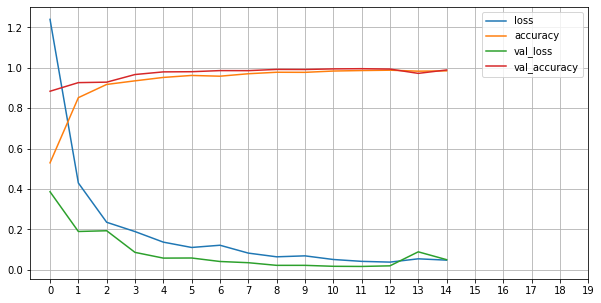

In [ ]:
pd.DataFrame(history.history).plot(figsize=(15,10))
plt.grid(True)
plt.xticks(np.arange(0, EPOCHS))
plt.show()

### Test on test_set

In [ ]:
scores = lenet.evaluate(X_test,y_test)
print("Accuracy on test_set: " + str(scores[1]))

99/99 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9892
Accuracy on test_set: 0.9892405271530151


### 10-fold-Cross Validation

In [ ]:
kf = KFold(10, shuffle = True, random_state = 42)
scores = []

for train, val in kf.split(X):
  # define folds
  X_train = X[train]
  y_train = y[train]
  X_val = X[val]
  y_val = y[val]
  X_train = X_train.reshape(X_train.shape[0], 80, 80, 3)
  X_val = X_val.reshape(X_val.shape[0], 80, 80, 3)

  print("-----------------\n")
  # define lenet
  kernel_initializer = keras.initializers.glorot_uniform(seed = np.random.randint(20))
  lenet = Sequential()
  lenet.add(layers.Conv2D(filters = 32, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (80, 80, 3)))
  lenet.add(layers.MaxPool2D(strides = 2))
  lenet.add(layers.Conv2D(filters = 48, kernel_size = (5,5), padding = 'valid', activation = 'relu'))
  lenet.add(layers.MaxPool2D(strides = 2))
  lenet.add(layers.Flatten())
  lenet.add(layers.Dense(256, activation = 'relu', kernel_initializer = kernel_initializer))
  lenet.add(layers.Dropout(0.5))
  lenet.add(layers.Dense(84, activation = 'relu', kernel_initializer = kernel_initializer))
  lenet.add(layers.Dropout(0.5))
  lenet.add(layers.Dense(7, activation = 'softmax'))
  # compile and fit lenet
  lenet.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer='adam')
  es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'auto', verbose = 1, patience = 3)
  history = lenet.fit(X_train, y_train, epochs = EPOCHS, validation_data = (X_val, y_val),  batch_size = 256, callbacks = [es])
  #predict
  y_pred = lenet.predict(X_val)
  y_pred = np.argmax(y_pred,axis=1)
  scores.append(accuracy_score(y_val,y_pred))

  tf.keras.backend.clear_session()

-----------------

Epoch 1/20
70/70 [==============================] - 2s 20ms/step - loss: 1.3956 - accuracy: 0.4467 - val_loss: 0.5024 - val_accuracy: 0.8405
Epoch 2/20
70/70 [==============================] - 1s 17ms/step - loss: 0.4763 - accuracy: 0.8343 - val_loss: 0.1688 - val_accuracy: 0.9397
Epoch 3/20
70/70 [==============================] - 1s 17ms/step - loss: 0.2465 - accuracy: 0.9182 - val_loss: 0.1156 - val_accuracy: 0.9565
Epoch 4/20
70/70 [==============================] - 1s 17ms/step - loss: 0.1818 - accuracy: 0.9385 - val_loss: 0.1075 - val_accuracy: 0.9580
Epoch 5/20
70/70 [==============================] - 1s 18ms/step - loss: 0.1572 - accuracy: 0.9485 - val_loss: 0.0965 - val_accuracy: 0.9630
Epoch 6/20
70/70 [==============================] - 1s 18ms/step - loss: 0.1398 - accuracy: 0.9522 - val_loss: 0.1128 - val_accuracy: 0.9595
Epoch 7/20
70/70 [==============================] - 1s 17ms/step - loss: 0.1169 - accuracy: 0.9607 - val_loss: 0.0820 - val_accuracy: 0

0.9648510894796918

### 10-fold Cross Validation LeNet performance

In [ ]:
k_fold_acc = np.mean(scores)
k_fold_acc

0.9648510894796918

### Saving the model

In [ ]:
model_path = "/content/drive/MyDrive/ml_dl/immagini-5/models/image_lenet.h5"
lenet.save(model_path)
lenet = keras.models.load_model(model_path)